### **Easy Sales Report (2015-2018)**: from problem to preparation <br>
Data source: [Georgina Mendez. Easy Latam. Kaggle. 2022](https://www.kaggle.com/datasets/georginasodimac/easy-latam)

---
**Business understanding**<br> 
- Background<br>
The company is a big store which sells articles and services for the construction, remodelling and equipment for home and gardens. The online purchase process follows the steps: 
    1. User add the product to the shopping car
    2. In the shopping card section, verify the product name, price and quantity
    3. Click on "Go to pay" and enter the email
    4. Enter the invoice information, followed by recipient information
    5. Make the payment

    The company has experienced abrupt changes on stock and reaching unwanted low stock limits.<br>
- Business Objectives<br>
    Anticipate the high demand of specific articles on each market.
- Business success criteria<br>
    Identify and quantify the subcategories with abrupt changes in their demand throughout the year for each market. <br>
    Is there a relationship between season of the year and a specific subcategory or product?
      



**Data Understanding**<br> 
- Describing Data<br>

| Field | Description |
| --- | --- |
|row_id|The number of the row|
|order_id|The number of the order|
|order_date|The date by which order was done|
|order_shipment|The date by which order was prepared and shipped|
|shipment_type|Describe the urgency of the shipment|
|client_id|The specific id assigned to the client|
|client_name|First and last name of the client|
|segment|The industry segment to which the client pertains|
|city|-|
|state|-|
|country|-|
|region|The region of LatinAmerica to which the order will be dispatched to|
|product_id|The unique id assigned to the product|
|category|The category to which the product belongs|
|subcategory|The subcategory to which the product belongs|
|product_name|The commercial name of the product|
|order_amount|Total value of the order|
|quantity|The ordered amount of the product|
|discount|The discount value, if applicable|
|profit|-|


- **EDA (Exploratory Data Analysis)**

Importing libraries

In [1]:
import translators as tss
import openpyxl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_excel("dataset_supertienda_sales.xlsx")

Using state Bogota D.C. server backend.
/home/lorenag/anaconda3/envs/firstenv/lib/python3.10/site-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


**1. Understanding the data**

In [2]:
print('\033[4m' + '\nDataset shape:'+'\033[0m' + str(df.shape) + '\n')
print('\033[4m' + 'Dataset description:' + '\033[0m')
print(df.describe())
print('\033[4m' + '\nDataset info:' + '\033[0m')
print(df.info()) # to see null values and data type


Dataset shape:(10254, 20)

Dataset description:
       Id. de la fila         Venta      Cantidad     Descuento      Ganancia
count    10254.000000  10254.000000  10254.000000  10254.000000  10254.000000
mean      5146.149308   2103.379037      3.740492      0.135709    214.737238
std       2970.876591   3491.494504      2.199333      0.195662   1189.617598
min          1.000000     15.660000      1.000000      0.000000 -18062.400000
25%       2574.250000    328.800000      2.000000      0.000000     -7.740000
50%       5146.500000    803.960000      3.000000      0.000000     80.000000
75%       7718.750000   2277.900000      5.000000      0.400000    325.800000
max      10288.000000  34740.800000     14.000000      0.800000  13132.800000

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10254 entries, 0 to 10253
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Id. de

**2. Preparation and transformation**

Visualize data frame

In [3]:
df.head(3)

,Id. de la fila,Id. del pedido,Fecha del pedido,Fecha de envío,Forma de envío,Id. del cliente,Nombre del cliente,Segmento,Ciudad,Estado,País,Región,Id. del producto,Categoría,Subcategoría,Nombre del producto,Venta,Cantidad,Descuento,Ganancia
0,1682,MX-2018-111899,2018-04-02,2018-04-06,Estándar,AM-11365,Araceli Manzanares,Empresa,Cruzeiro do Sul,Acre,Brasil,Sur,MAT-AR-10004857,Material de oficina,Arte,"Boston Rotuladores, Tamaños variados",591.0,3,0.0,206.4
1,5919,MX-2018-113922,2018-10-08,2018-10-11,Rápido,BS-12130,Benjamín Saavedra,Cliente,Rio Branco,Acre,Brasil,Sur,MOB-LI-10000647,Mobiliario,Librerías,"Dania Conjunto de estantes, Metal",2250.8,2,0.0,922.8
2,5920,MX-2018-113922,2018-10-08,2018-10-11,Rápido,BS-12130,Benjamín Saavedra,Cliente,Rio Branco,Acre,Brasil,Sur,MAT-CA-10002956,Material de oficina,Carpetas,"Avery Anillas, Transparente",129.0,5,0.0,11.0


Translating the header

In [4]:
header = list(df.columns)
header = [tss.google(query_text=x, from_language="es", to_language="en") for x in header]
header

['Id.',
 'Order id.',
 'Order date',
 'Shipping date',
 'Shipping way',
 'Customer id.',
 'Customer name',
 'Segment',
 'City',
 'Condition',
 'Country',
 'Region',
 'Product id.',
 'Category',
 'Subcategory',
 'Product name',
 'Sale',
 'Quantity',
 'Discount',
 'Gain']

Rename columns

In [5]:
df.columns = header
df = df.rename(columns = {'Condition': 'state', 'Sale': 'total_value', 'Gain': 'profit'})
df.columns = df.columns.str.lower()
df.columns = df.columns.str.replace(" ", "_")
df.columns = df.columns.str.removesuffix(".")
df.head(3)

,id,order_id,order_date,shipping_date,shipping_way,customer_id,customer_name,segment,city,state,country,region,product_id,category,subcategory,product_name,total_value,quantity,discount,profit
0,1682,MX-2018-111899,2018-04-02,2018-04-06,Estándar,AM-11365,Araceli Manzanares,Empresa,Cruzeiro do Sul,Acre,Brasil,Sur,MAT-AR-10004857,Material de oficina,Arte,"Boston Rotuladores, Tamaños variados",591.0,3,0.0,206.4
1,5919,MX-2018-113922,2018-10-08,2018-10-11,Rápido,BS-12130,Benjamín Saavedra,Cliente,Rio Branco,Acre,Brasil,Sur,MOB-LI-10000647,Mobiliario,Librerías,"Dania Conjunto de estantes, Metal",2250.8,2,0.0,922.8
2,5920,MX-2018-113922,2018-10-08,2018-10-11,Rápido,BS-12130,Benjamín Saavedra,Cliente,Rio Branco,Acre,Brasil,Sur,MAT-CA-10002956,Material de oficina,Carpetas,"Avery Anillas, Transparente",129.0,5,0.0,11.0


Dropping irrelevant columns

In [6]:
df = df.drop(['id', 'order_id', 'customer_id', 'customer_name', 'state', 'region', 'product_id'], axis=1)
df.head(3)

,order_date,shipping_date,shipping_way,segment,city,country,category,subcategory,product_name,total_value,quantity,discount,profit
0,2018-04-02,2018-04-06,Estándar,Empresa,Cruzeiro do Sul,Brasil,Material de oficina,Arte,"Boston Rotuladores, Tamaños variados",591.0,3,0.0,206.4
1,2018-10-08,2018-10-11,Rápido,Cliente,Rio Branco,Brasil,Mobiliario,Librerías,"Dania Conjunto de estantes, Metal",2250.8,2,0.0,922.8
2,2018-10-08,2018-10-11,Rápido,Cliente,Rio Branco,Brasil,Material de oficina,Carpetas,"Avery Anillas, Transparente",129.0,5,0.0,11.0


Handle duplicated values

In [7]:
print(f'Current shape: ', df.shape)
print(f'Duplicated values: ', df.duplicated().sum())
df = df.drop_duplicates()
print(f'After removing duplicates, shape: ', df.shape)

Current shape:  (10254, 13)
Duplicated values:  1
After removing duplicates, shape:  (10253, 13)


Review and translate some column values

In [8]:
print('\033[4m' + '\nSegment values:' + '\033[0m')
print(df.segment.value_counts())
print('\033[4m' + '\nShipping_way:' + '\033[0m')
print(df.shipping_way.value_counts())


Segment values:
Cliente            5293
Empresa            3048
Pequeña empresa    1912
Name: segment, dtype: int64

Shipping_way:
Estándar     6172
Rápido       2097
Urgente      1469
Mismo día     515
Name: shipping_way, dtype: int64


In [9]:
print('\033[4m' + '\nCategory values:' + '\033[0m')
print(df.category.value_counts())
print('\033[4m' + '\nSucategory values:' + '\033[0m')
print(df.subcategory.value_counts())


Category values:
Material de oficina    5836
Mobiliario             2370
Tecnología             2047
Name: category, dtype: int64

Sucategory values:
Carpetas             974
Sillas               930
Almacenamiento       802
Sobres               668
Accesorios           658
Librerías            641
Copiadoras           628
Grapas               628
Teléfonos            627
Mobiliario           622
Papel                620
Suministros          610
Etiquetas            608
Arte                 604
Electrodomésticos    322
Mesas                177
Máquinas             134
Name: subcategory, dtype: int64


In [10]:
df['segment'] = df['segment'].replace(['Cliente', 'Empresa', 'Pequeña empresa'], 
                                      ['client', 'company', 'small company'])

df['shipping_way'] = df['shipping_way'].replace(['Estándar', 'Rápido', 'Urgente', 'Mismo día'], 
                                                ['standard', 'fast', 'urgent', 'same day'])
df

,order_date,shipping_date,shipping_way,segment,city,country,category,subcategory,product_name,total_value,quantity,discount,profit
0,2018-04-02,2018-04-06,standard,company,Cruzeiro do Sul,Brasil,Material de oficina,Arte,"Boston Rotuladores, Tamaños variados",591.0000,3,0.000,206.4000
1,2018-10-08,2018-10-11,fast,client,Rio Branco,Brasil,Mobiliario,Librerías,"Dania Conjunto de estantes, Metal",2250.8000,2,0.000,922.8000
2,2018-10-08,2018-10-11,fast,client,Rio Branco,Brasil,Material de oficina,Carpetas,"Avery Anillas, Transparente",129.0000,5,0.000,11.0000
3,2016-06-14,2016-06-18,standard,client,Rio Branco,Brasil,Mobiliario,Mobiliario,"Tenex Bandeja apiladora, Negro",504.6000,3,0.000,95.4000
4,2016-06-14,2016-06-18,standard,client,Rio Branco,Brasil,Mobiliario,Librerías,"Safco Vitrina, Convencional",3376.8000,3,0.000,641.4000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10249,2016-10-16,2016-10-22,standard,small company,Cabimas,Venezuela,Tecnología,Máquinas,"Konica Calculadora, Blanco",400.3200,2,0.400,-253.6800
10250,2016-10-16,2016-10-22,standard,small company,Cabimas,Venezuela,Tecnología,Copiadoras,"Canon Fotocopiadora, 2",2090.1296,2,0.402,-77.0704
10251,2016-10-16,2016-10-22,standard,small company,Cabimas,Venezuela,Material de oficina,Etiquetas,"Smead Etiquetas para carpetas de archivos, Blanco",319.6800,9,0.400,31.6800
10252,2016-10-16,2016-10-22,standard,small company,Cabimas,Venezuela,Material de oficina,Suministros,"Elite Recortadora, Azul",500.0400,3,0.400,-33.3600


In [11]:
category_es = df.category.value_counts()
category_es = category_es.index
category_en = [tss.google(query_text=x, from_language="es", to_language="en") for x in category_es]
print('Translated categories: ', category_en)

subcategory_es = df.subcategory.value_counts()
subcategory_es = subcategory_es.index
subcategory_en = [tss.google(query_text=x, from_language="es", to_language="en") for x in subcategory_es]
print('Translated subcategories: ', subcategory_en)

Translated categories:  ['Office supplies', 'Furniture', 'Technology']
Translated subcategories:  ['Folders', 'Chairs', 'Storage', 'Envelopes', 'Accessories', 'Libraries', 'Copiers', 'Staples', 'phones', 'Furniture', 'Paper', 'Supplies', 'Tags', 'Art', 'Home appliances', 'Tables', 'Machines']


In [12]:
df['category'] = df['category'].replace(category_es, category_en)
df['subcategory'] = df['subcategory'].replace(subcategory_es, subcategory_en)
df.head(4)

,order_date,shipping_date,shipping_way,segment,city,country,category,subcategory,product_name,total_value,quantity,discount,profit
0,2018-04-02,2018-04-06,standard,company,Cruzeiro do Sul,Brasil,Office supplies,Art,"Boston Rotuladores, Tamaños variados",591.0,3,0.0,206.4
1,2018-10-08,2018-10-11,fast,client,Rio Branco,Brasil,Furniture,Libraries,"Dania Conjunto de estantes, Metal",2250.8,2,0.0,922.8
2,2018-10-08,2018-10-11,fast,client,Rio Branco,Brasil,Office supplies,Folders,"Avery Anillas, Transparente",129.0,5,0.0,11.0
3,2016-06-14,2016-06-18,standard,client,Rio Branco,Brasil,Furniture,Furniture,"Tenex Bandeja apiladora, Negro",504.6,3,0.0,95.4


**3. Univariate analysis**

Creating a function to print the total orders for each category by year

In [13]:
def univariate_count_printer(year, variable):
    df_by_year = df[(df["order_date"]>= year + "-01-01") & (df["order_date"]<= year + "-12-31")]
    df_by_variable = df_by_year[variable]
    df_by_variable.value_counts().plot(kind="bar")
    plt.title("Order count by {} for {} year".format(variable, year))
    plt.xlabel("{} type".format(variable))
    plt.ylabel("count")
    plt.show()

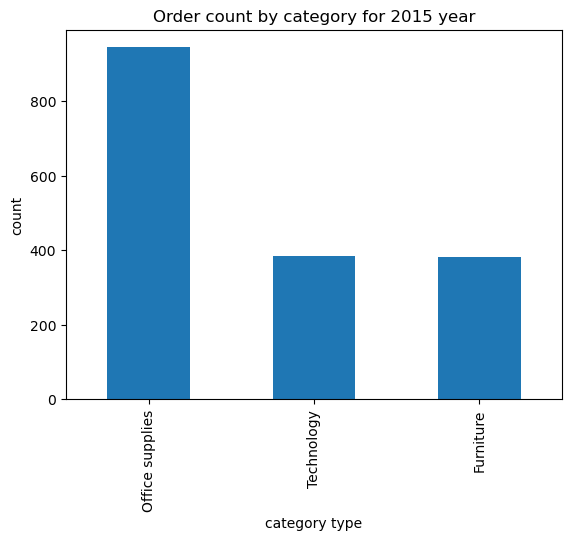

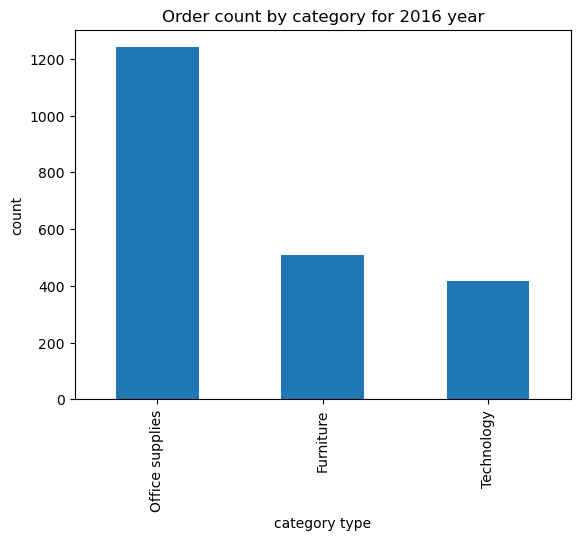

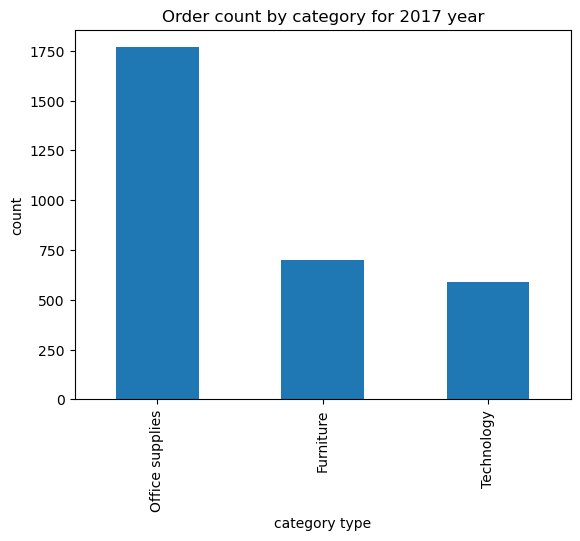

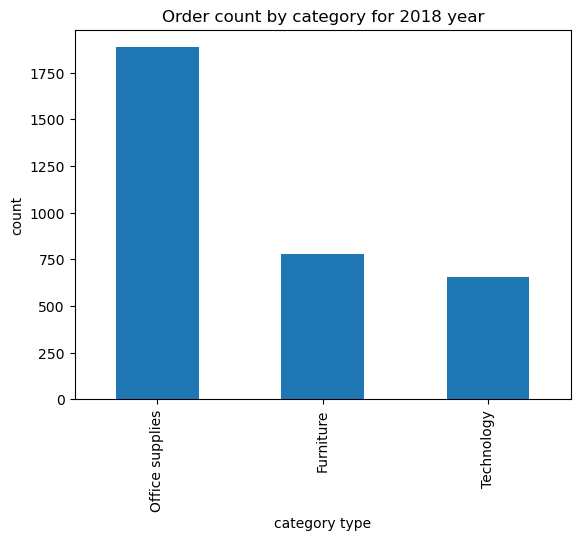

In [14]:
univariate_count_printer("2015", "category")
univariate_count_printer("2016", "category")
univariate_count_printer("2017", "category")
univariate_count_printer("2018", "category")

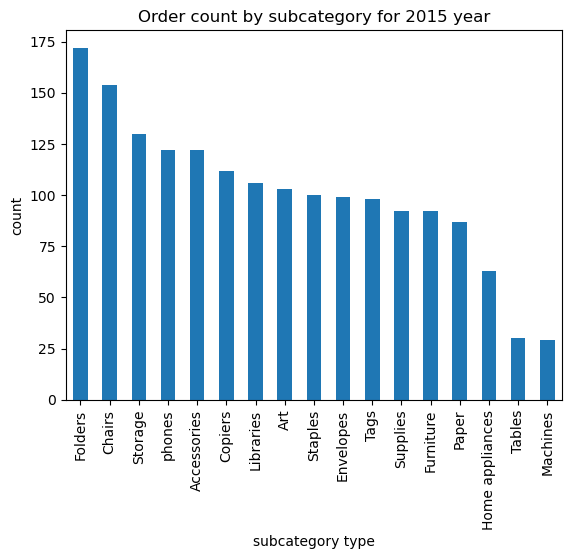

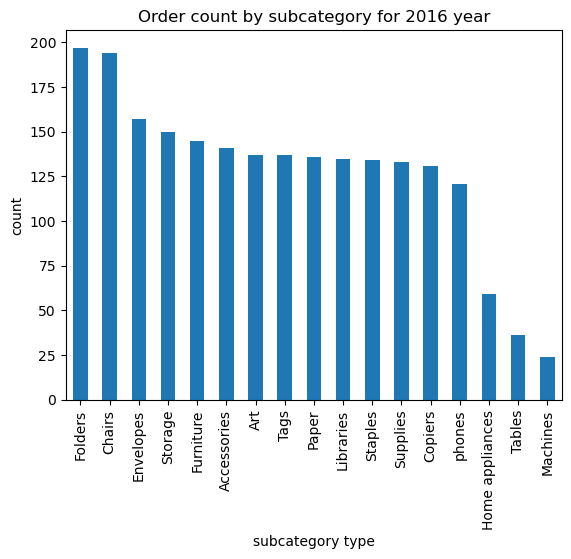

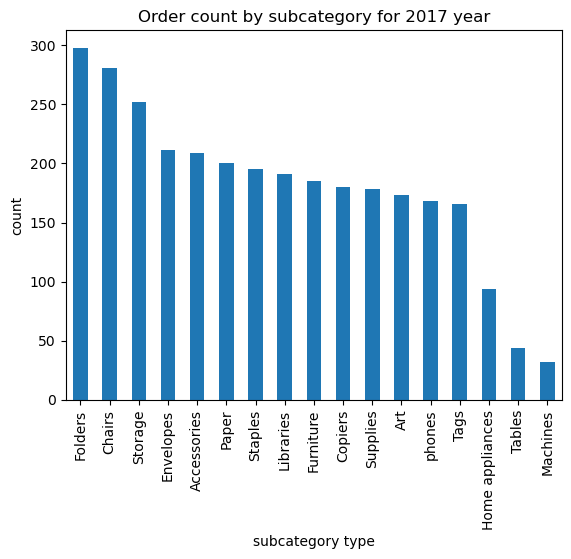

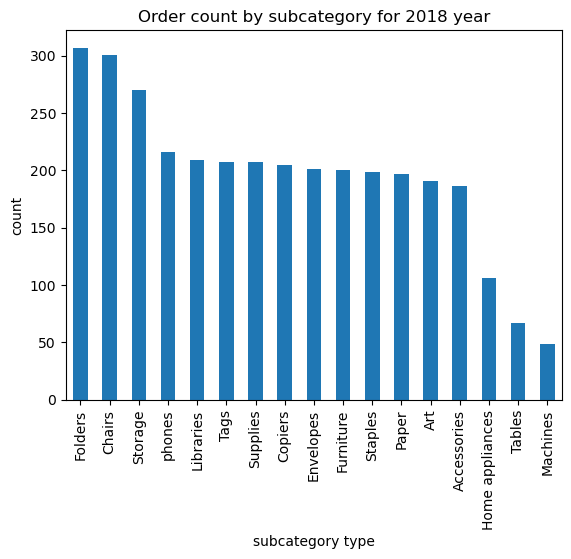

In [15]:
univariate_count_printer("2015", "subcategory")
univariate_count_printer("2016", "subcategory")
univariate_count_printer("2017", "subcategory")
univariate_count_printer("2018", "subcategory")

<AxesSubplot:>

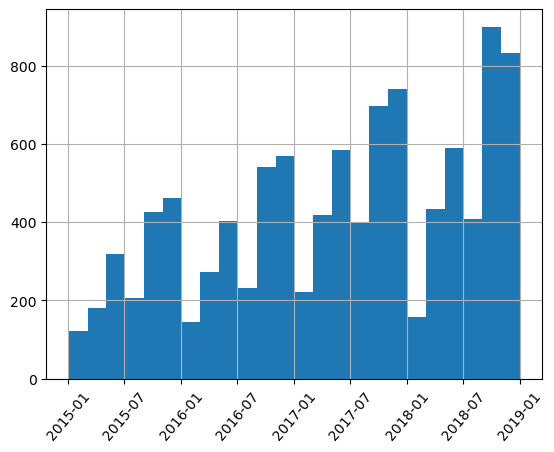

In [16]:
df.order_date.hist(xrot=50, bins=24)

Creating a function to get the increase rate of total orders of a bimester on  a specific year

In [17]:
def total_orders_increase_bimester(year1, year2, month1, month2):
        def bimester_orders_count(year):
                df_bimester = df[(df["order_date"]>= year + "-" + month1 + "-01") & 
                        (df["order_date"]<= year + "-" + month2 + "-31")]
                total_bimester_orders = df_bimester.order_date.value_counts().sum()
                return total_bimester_orders
        
        return 100 * (bimester_orders_count(year2) - bimester_orders_count(year1)) // bimester_orders_count(year1)       

In [18]:
print("Increase rate of total orders in 2018 for Sept-Oct period: {}%".format(total_orders_increase_bimester("2017", "2018", "09", "10")))
print("Increase rate of total orders in 2018 for Nov-Dec period: {}%".format(total_orders_increase_bimester("2017", "2018", "11", "12")))

Increase rate of total orders in 2018 for Sept-Oct period: 29%
Increase rate of total orders in 2018 for Nov-Dec period: 12%


Boxplot diagram of Total value of orders

array([[<AxesSubplot:title={'center':'order_date'}>,
        <AxesSubplot:title={'center':'shipping_date'}>],
       [<AxesSubplot:title={'center':'total_value'}>,
        <AxesSubplot:title={'center':'quantity'}>],
       [<AxesSubplot:title={'center':'discount'}>,
        <AxesSubplot:title={'center':'profit'}>]], dtype=object)

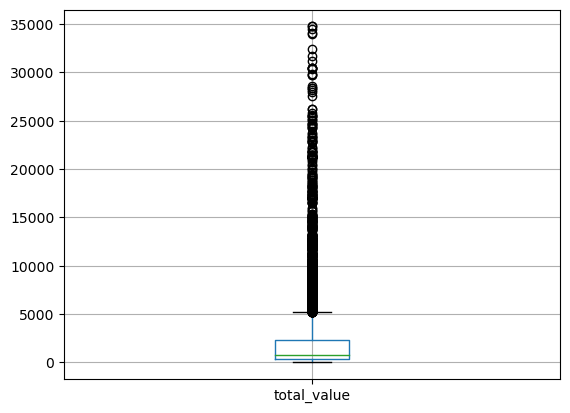

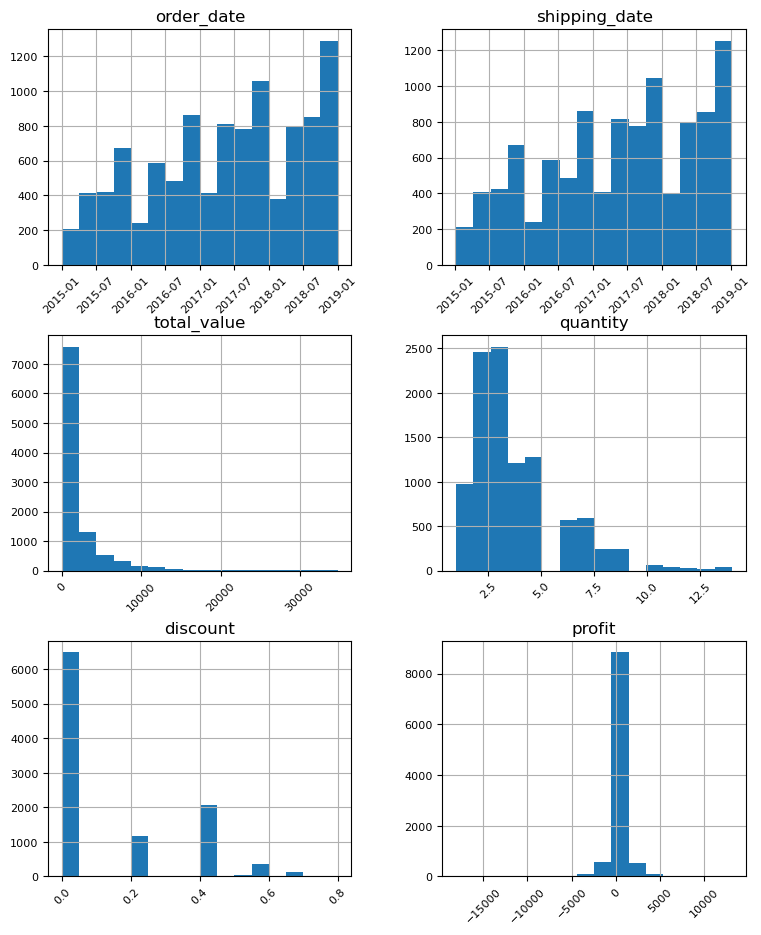

In [19]:
#box plot to detect outliers. Outlier is a point or set of points that are different from other points.
df[["total_value"]].boxplot()
df.hist(figsize=(9, 11), bins=16, xlabelsize=8, ylabelsize = 8, xrot = 45)

**4. Study of relationships between variables**

Text(0, 0.5, 'quantity')

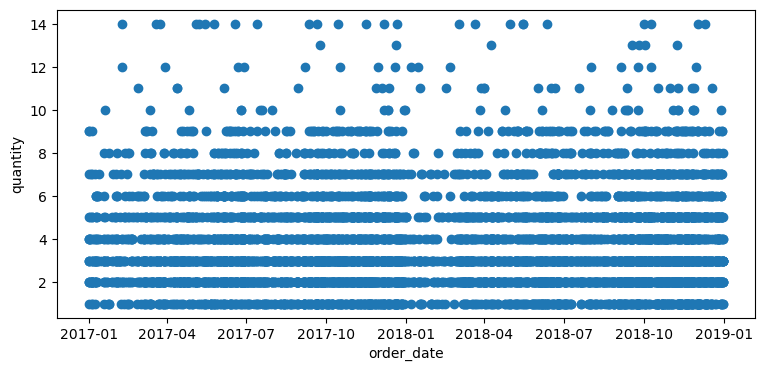

In [20]:
df_2017_2018 = df[(df["order_date"]>= "2017-01-01") & (df["order_date"]<= "2018-12-31")]
fig, ax = plt.subplots(figsize=(9,4))
ax.scatter(df_2017_2018["order_date"], df_2017_2018["quantity"])
ax.set_xlabel("order_date")
ax.set_ylabel("quantity")

<AxesSubplot:xlabel='order_date'>

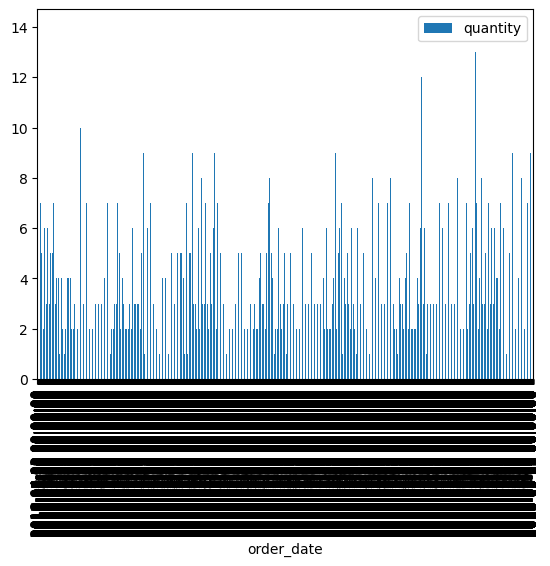

In [22]:
# get bar plots of month (2017-2018) vs total orders
df.plot.bar(x="order_date", y="quantity")

**5. Conclusions**

Univariate analysis
1. Orders under Office supplies Category represent more than the double of the orders that come from Furniture and Technology.
2. There was a significant increment on the number of orders between years 2015 and 2017.
3. In the last year, 2018, the number of orders under the Folders, Chairs and Storage subcategories are 38-55% higher than the rest of the subcategories that have an average of 200 orders.
4. The number of orders from January to August remained almost the same comparing the years 2017 and 2018. Nevertheless, for the 2018 year there was an increase in orders of 29% and 12% for the periods Sept-Oct and Nov-Dec, respectively
5. 